In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Ejercicio: La temperatura promedio de una máquina es de 37°C, con una desviación estándar medida de 1.5 ºC. Suponiendo que la distribución de la temperatura puede ser _aproximada_ por una normal, ¿qué tan probable es encontrar una temperatura de 35 o menos?

$$
p(x \leq 35)
$$

In [2]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

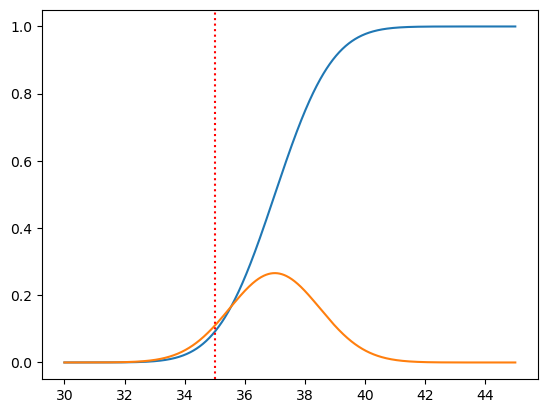

In [3]:
rx = np.linspace(30, 45, 1000)
cum_fun = norm.cdf(rx,mean,std)
plt.plot(rx, cum_fun);
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)
plt.axvline(35, ls=':',c='r') #linestyle, color

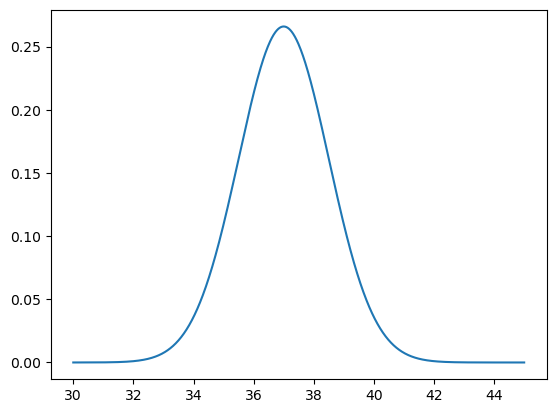

In [4]:
rx = np.linspace(30, 45, 1000)
den_fun = norm.pdf(rx,mean,std);
plt.plot(rx, den_fun)

$$
f(x) = x^2
$$

obtener

$$
F(x) = \int_0^2 f(x)dx
$$

In [5]:
# integracion numerica
from scipy.integrate import quad

# definir f(x)

def f(x):
    return x**2

quad(f,a=0, b=2)


(2.666666666666667, 2.960594732333751e-14)

In [6]:
mean = 37
std = 1.5
# x = np.linspace(-273, 37, 1000)
x = 35
norm.cdf(x,mean,std)

0.09121121972586788

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

In [7]:
# definamos nuestra propia funcion normal

def normal(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))
# 
quad(normal, -np.inf, 35, args=(37, 1.5)) # same as norm.cdf(35, 37, 1.5)

(0.0912112197258679, 1.428527094724896e-11)

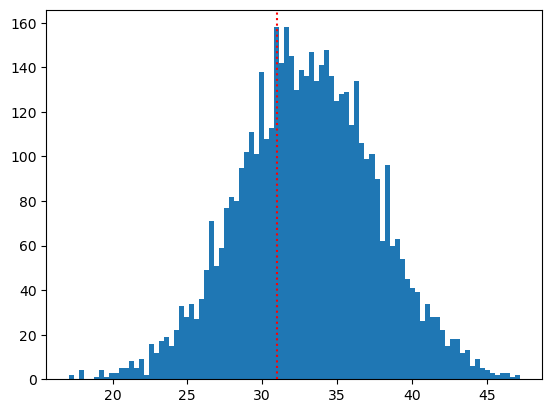

In [8]:
# ejemplo, azucar de agave, media=33, sd=4.5 parametros poblacionales
random_normal_var = norm.rvs(33, 4.5, 5000)
plt.hist(random_normal_var, bins=90);
plt.axvline(31, c='red', ls=':')

In [9]:
media = 22
# que tan probable es obtener una media de 31 si proviene de una poblacion con media=33 y sd=4.5?
quad(normal, -np.inf, media, args=(33, 4.5))

(0.007253771124867805, 2.0168614789731595e-11)

In [10]:
norm.cdf(22,33,4.5)

0.007253771124867817

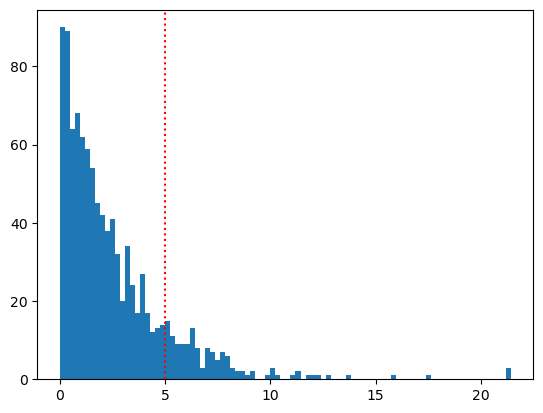

In [11]:
from scipy.stats import expon
rvs_expon = expon.rvs(scale=2.5, size=1000)
plt.hist(rvs_expon,bins=90);
plt.axvline(5,ls=':', c='r')

In [12]:
x=5
expon.cdf(5, 2.5)

0.9179150013761012

In [13]:
# cual es la probabilidad de x despues de 5 horas
1-expon.cdf(5, 2.5)

0.08208499862389884

In [14]:
# cual es la probabilidad de x entre 3 y 7 horas?
expon.cdf(7, 2.5) - expon.cdf(3, 2.5)

0.5954216631743912

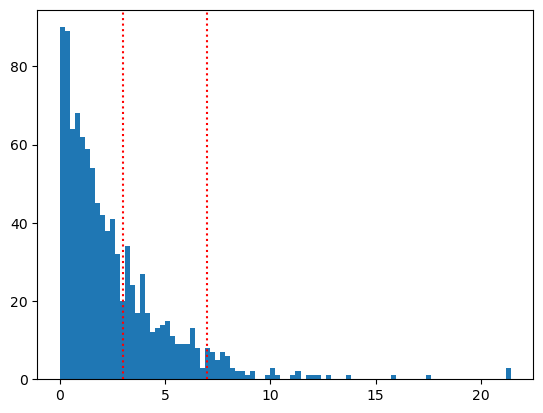

In [15]:
plt.hist(rvs_expon,bins=90);
plt.axvline(3,ls=':', c='r')
plt.axvline(7,ls=':', c='r')

In [16]:
1-expon.cdf(7, 2.5)

0.011108996538242266

scale: tamaño del intervalo (rango), limite superior - limite inferior

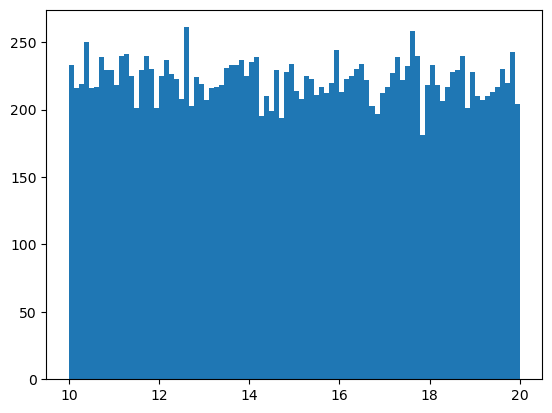

In [17]:
from scipy.stats import uniform
rvs_unif = uniform.rvs(10, 10, 20000)
plt.hist(rvs_unif, bins=90);

In [18]:
# cual seria la probabilida de x <= 14?
uniform.cdf(11.1, 10, 10)

0.10999999999999996

In [19]:
1/10

0.1

Ejemplo 1:

La distribución uniforme tiene dos parámetros, $a$ y $b$ que representan los límites inferior y superior de la distribución. 

$$
p(x) = \frac{1}{b-a}\quad \text{ si $x$ está en } [a,b]
$$

Supongamos que la duración de una llamada telefónica en minutos sigue una distribución uniforme entre 0 y 20 minutos. ¿Cuál es la probabilidad de que la llamada dure más de 15 minutos?

Ejemplo 2:

La distribución exponencial se puede parametrizar de dos maneras:

$$
f(x) = \lambda e^{-\lambda x}
$$

$$
f(x) = \frac{1}{\beta}e^{-\frac{1}{\beta}x}
$$

En donde $\lambda$ es la tasa, y $\beta$ es la escala. $\beta=1/\lambda$

Supongamos que el tiempo entre llegadas de autobuses en una estación es en promedio de 10 minutos. ¿Cuál es la probabilidad de que el próximo camión llegue en 15 minutos o menos?

Simular también 3000 valores de una distribución exponencial con el parámetro dado, y graficar el histograma junto con el valor de la pregunta (15 minutos).

```python
from scipy.stats import expon

expon(..., scale=10)
```

Ejemplo 3:

El tiempo promedio de una máquina para fallar es de 1200 horas. ¿Cuál es la probabilidad de que falle antes de 1500 horas? Simular 3000 valores, graficar e indicar en dónde se encuentra el valor x.

Ejemplo 4:

El peso de las manzanas en una granjka sigue una distribución normal con un promedio de 200g y una desviación estándar de 50g. ¿Cuál es la probabilidad de que una manzana pese más de 250g? Simular, graficar e indicar el valor.

Ejmplo 5: 

La altura de los estudiantes de una universidad se distribuye normalmente con un promedio de 170 cm y una desviación estándar de 10cm. ¿Qué porcentaje de estudiantes mide entre 160 cm y 180 cm? Simular, graficar e indicar los valores.

Ejemplo 6 (exponencial):

Suponer que estamos interesados en analizar una taquilla de cine con un solo empleado vendiendo entradas. Las llegadas de los clientes a la taquilla siguen un proceso de Poisson con una tasa de llegada de $\lambda=10$ clientes por hora. El tiempo que toma al empleado vender una entrada sigue una distribución exponencial con una tasa de servicio de $\lambda_2=12$ clientes por hora. 

Simular las llegadas y los tiempos de servicio para 100 clientes, calcular el tiempo de espera en la cola para cada cliente. 

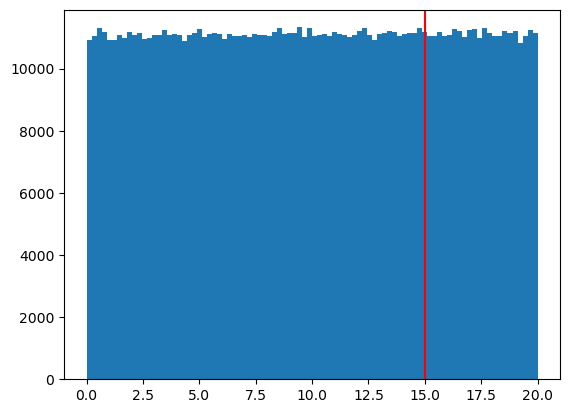

In [20]:
from scipy.stats import uniform

a=0
b=20

unif_rvs = uniform.rvs(a, b, 1000000)

plt.hist(unif_rvs,bins=90);
plt.axvline(15,c='red')

In [21]:
1-uniform.cdf(15,a,b)

0.25

In [22]:
1/20*5

0.25

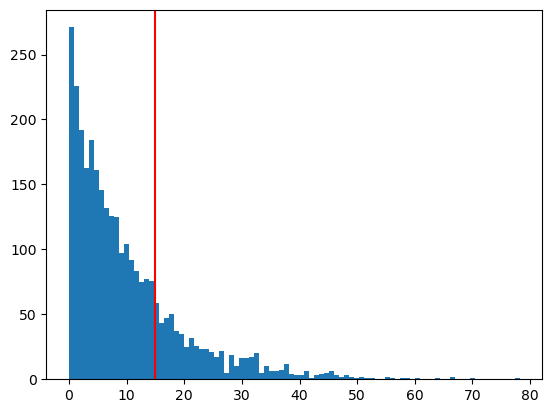

In [23]:
scale = 15
expon_rvs = expon.rvs(scale=10,size=3000)
plt.hist(expon_rvs,bins=90);
plt.axvline(scale,color='red')

In [24]:
expon.cdf(15,scale=10)

0.7768698398515702

In [25]:
quad(expon.pdf, 0, 15, args=(0,10))

(0.7768698398515701, 8.624987833400712e-15)

In [26]:
help(expon.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



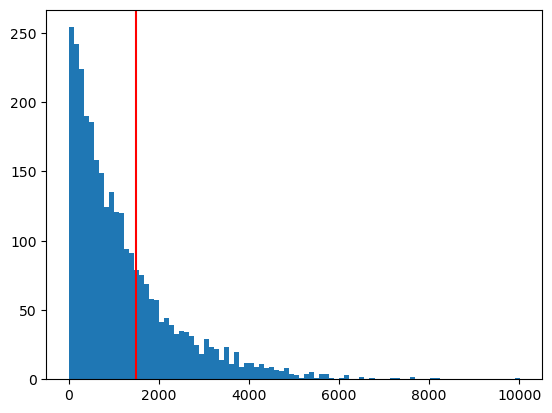

In [27]:
scale = 1200
x=1500
expon_rvs = expon.rvs(loc=0, scale=scale,size=3000)
plt.hist(expon_rvs,bins=90);
plt.axvline(x,color='red')

In [28]:
expon.cdf(x,scale=scale)

0.7134952031398099

In [29]:
quad(expon.pdf, 0, x, args=(0,scale))

(0.7134952031398099, 7.921388024854202e-15)

In [30]:
def exponential(x,lam):
    return lam*np.exp(-lam*x)

quad(exponential, 0, x, args=(1/scale))

(0.7134952031398099, 7.921388024854202e-15)

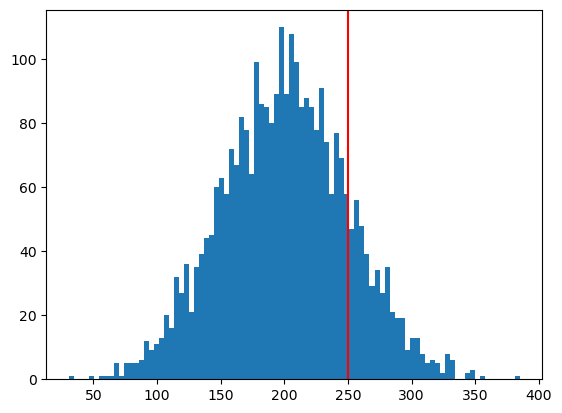

In [31]:
mu, sigma = 200, 50

rvs_norm = norm.rvs(loc=mu, scale=sigma, size=3000)
plt.hist(rvs_norm,bins=90);
plt.axvline(250,c='red')

In [32]:
1 - norm.cdf(250,200,50)

0.15865525393145707

In [33]:
quad(norm.pdf, 250, 400, args=(200, 50))

(0.15862358268962398, 1.7610755375055295e-15)

In [34]:
norm.cdf(180, 170, 10) - norm.cdf(160,170,10)

0.6826894921370859

In [35]:
quad(norm.pdf, 160, 180, args=(170, 10))

(0.6826894921370861, 7.579375928402477e-15)

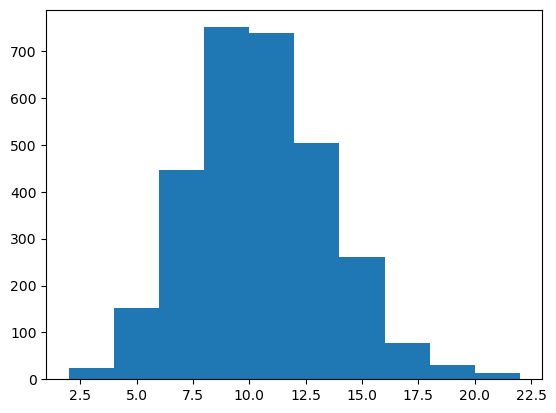

In [36]:
from scipy.stats import poisson

rvs_pois = poisson.rvs(mu=10, size=3000)
plt.hist(rvs_pois);

In [37]:
rvs_pois[0:9]

array([16, 10,  9, 10,  8, 14,  7, 10, 12])

Ejemplo 6 (exponencial):

Suponer que estamos interesados en analizar una taquilla de cine con un solo empleado vendiendo entradas. Las llegadas de los clientes a la taquilla siguen un proceso de Poisson con una tasa de llegada de
clientes por hora. El tiempo que toma al empleado vender una entrada sigue una distribución exponencial con una tasa de servicio de

clientes por hora.

Simular las llegadas y los tiempos de servicio para 100 clientes, calcular el tiempo de espera en la cola para cada cliente. 

La tasa de llegada (clientes por hora) es de 10

La tasa de servicio (clientes por hora) es de 12

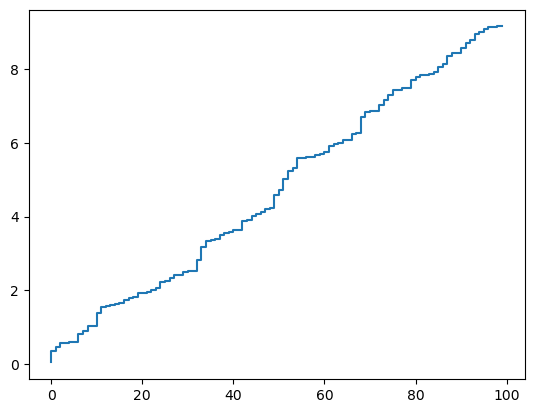

In [38]:
np.random.seed(42) 
n_clientes = 100

lambda_llegada = 10 # rate
lambda_servicio = 12 # rate, beta=1/rate
# tiempos entre llegadas siguen una dist exponencial
tiempos_llegadas = expon.rvs(scale=1/lambda_llegada, size=n_clientes)

# tiempos entre servicios siguen una dist exponencial
tiempos_servicios = expon.rvs(scale=1/lambda_servicio, size=n_clientes)

tiempo_de_llegada = np.cumsum(tiempos_llegadas)

plt.step(x=np.arange(0, n_clientes),y=tiempo_de_llegada)

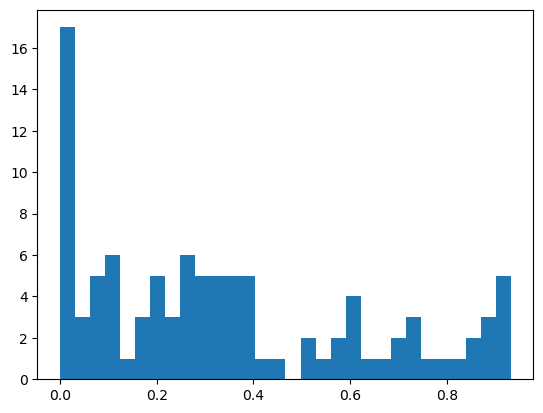

In [39]:
inicio_de_servicio = np.zeros(n_clientes)
fin_de_servicio = np.zeros(n_clientes)

# primer cliente se atiende de inmediato
inicio_de_servicio[0] = tiempo_de_llegada[0]
fin_de_servicio[0] = inicio_de_servicio[0] + tiempos_servicios[0]


# simular la cola para el resto de los clientes

for i in range(1, n_clientes):
    # dos posibilidades: 1) el cliente llega cuando el empleado ya está libre porque atendió al i-1,
    # su inicio de servicio es exactamente tiempo de llegada i
    # 2) el empleado aún no termina de atender al ciente i-1, y el cliente i espera
    inicio_de_servicio[i] = max(tiempo_de_llegada[i], fin_de_servicio[i-1])
    fin_de_servicio[i] = inicio_de_servicio[i] + tiempos_servicios[i]

# calcular tiempos de espera en la cola
tiempos_de_espera = inicio_de_servicio - tiempo_de_llegada
plt.hist(tiempos_de_espera, bins=30);

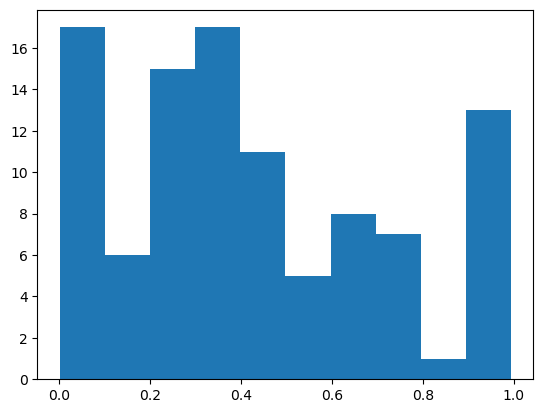

In [40]:
tiempo_total_en_sistema = fin_de_servicio - tiempo_de_llegada
plt.hist(tiempo_total_en_sistema);

In [41]:
np.mean(tiempos_de_espera)*60 # en minutos

20.5811115107257

In [42]:
(1/lambda_llegada, 1/lambda_servicio)

(0.1, 0.08333333333333333)

In [43]:
np.mean(tiempo_total_en_sistema) * 60

25.462236088368847

In [44]:
tiempo_de_llegada.shape

(100,)

In [45]:
mu = 100
sigma = 5
norm.cdf(mu + sigma, mu, sigma) - norm.cdf(mu - sigma, mu, sigma)

0.6826894921370859

In [46]:
def area_norm(mu, sigma, factor):
    area = norm.cdf(mu + factor * sigma, mu, sigma) - norm.cdf(mu - factor * sigma, mu, sigma)
    return print(area.round(9))

factor = [1, 2, 3, 4, 5, 6]

for i in factor:
    area_norm(mu=100, sigma=10, factor=i)

0.682689492
0.954499736
0.997300204
0.999936658
0.999999427
0.999999998


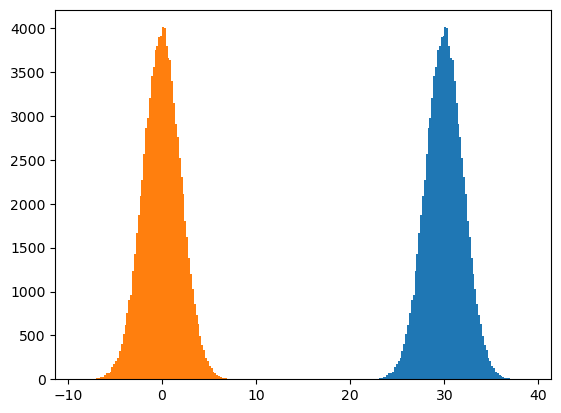

In [47]:
mu=30
sigma=2
x_norm = norm.rvs(mu, sigma, 100000)
x_centrada = x_norm - mu

plt.hist(x_norm, bins=90);
plt.hist(x_centrada,bins=90);

In [48]:
x_centrada.mean()

0.0020300518804678347

## Distribución normal bivariada

Es un caso de la normal multivariada. Describe el comportamiento de dos variables capturando la relación lineal que existe entre ellas en $\Sigma$

In [60]:
var_x, var_y = 1, 1
correlation = 0.9
std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)
np.array([[var_x, correlation * std_x * std_y], [correlation * std_x * std_y, var_y]])


array([[1. , 0.9],
       [0.9, 1. ]])

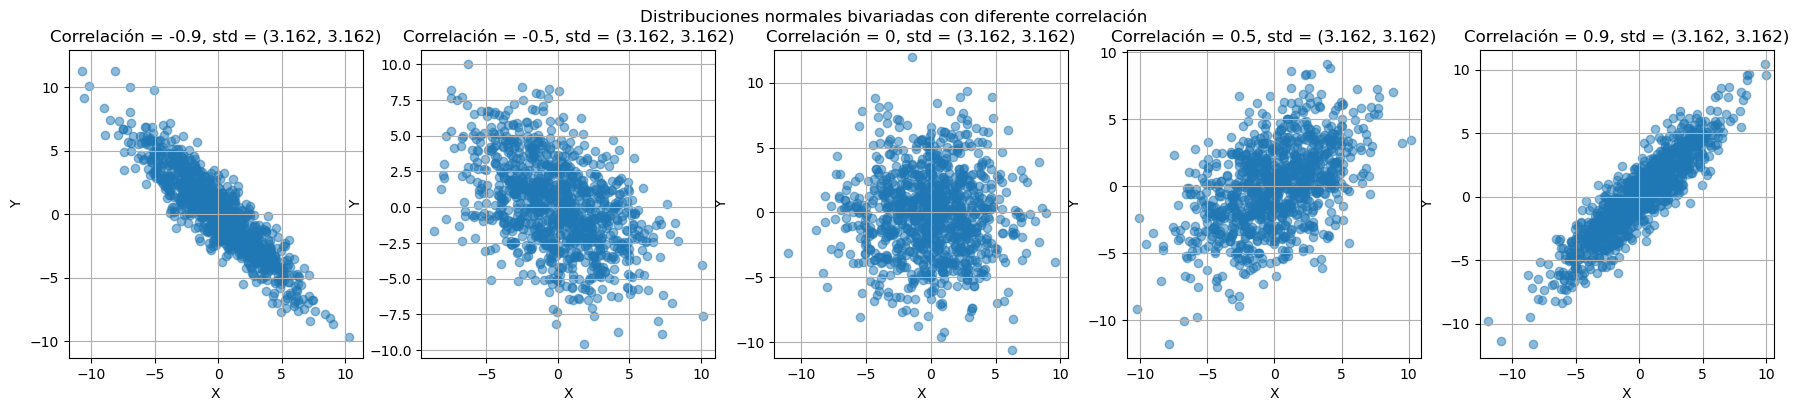

In [73]:
# simular la bivariada para diferentes valores de correlación
var_x, var_y = 10, 10

def simulate_and_plot_bivariate_normal(ax, correlation, mean_vector, var_x, var_y, size = 1000):
    std_x = np.sqrt(var_x).round(3)
    std_y = np.sqrt(var_y).round(3)
    covariance_matrix = [[var_x, correlation * std_x * std_y], [correlation * std_x * std_y, var_y]]
    # generar una muestra
    sample_biv = np.random.multivariate_normal(mean_vector, covariance_matrix, size)
    x, y = sample_biv[:, 0], sample_biv[:, 1]

    # crear scatterplot
    ax.scatter(x, y, alpha=0.5)
    ax.set_title(f'Correlación = {correlation}, std = {std_x, std_y}')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.axis("equal")
    ax.grid(True)

# crear subplot

fig, axes = plt.subplots(1, 5, figsize=(22, 4))

correlations = [-0.9, -0.5, 0, 0.5, 0.9]

for ax, corr in zip(axes, correlations):
    simulate_and_plot_bivariate_normal(ax,corr, [0, 0], 10, 10)

plt.suptitle("Distribuciones normales bivariadas con diferente correlación")
# gaurdar como png con 300 pts por pulgada
plt.savefig("bivariate_normal_5cor.png", dpi=300)

In [78]:
var_x, var_y = 1, 30
correlation = 0.9
std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)
covariance_matrix = np.array([[var_x, correlation * std_x * std_y], [correlation * std_x * std_y, var_y]])
size = 1000
sample_biv = np.random.multivariate_normal([0,0], covariance_matrix, size)
x, y = sample_biv[:, 0], sample_biv[:, 1]
np.corrcoef(x,y * 3)

array([[1.        , 0.89395104],
       [0.89395104, 1.        ]])

Suponer que se tiene una distribución normal bivariada con $\boldsymbol{\mu}=(3.1, 3)$, con matriz de covarianzas

$$
\Sigma = \begin{bmatrix}
    0.7163 & 0.6876\\
    0.6876 & 1.06
    \end{bmatrix}
$$

1. Encontrar la distancia euclideana de los puntos $p_1=(5,5)$, $p_2=(5,2)$ con respecto al centroide.
2. Encontrar la distancia de Mahalanobis
3. Verificar si $p_1,p_2$ son outliers de a cuerdo a la distribución de $d^2_M$, al $\alpha=0.05$. 

In [80]:
from scipy.stats import multivariate_normal
from numpy.linalg import inv
# definir parámetros de la normal

mu = np.array([3.1, 3.0])
Sigma = np.array([[0.7163, 0.6876], 
                  [0.6876, 1.06]])
sigma_inv = inv(Sigma)
sigma_inv

array([[ 3.70002901, -2.40013203],
       [-2.40013203,  2.50031206]])

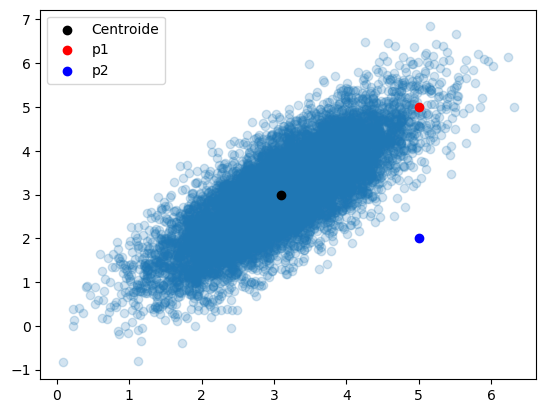

In [82]:
samples = np.random.multivariate_normal(mu, Sigma, 10000)
p1 = np.array([5,5])
p2 = np.array([5, 2])

plt.scatter(samples[:,0], samples[:, 1], alpha=0.2)
plt.scatter(mu[0], mu[1], color='black', label='Centroide')
plt.scatter(p1[0], p1[1], color='red', label='p1')
plt.scatter(p2[0], p2[1], color='blue', label='p2')
plt.legend()

In [83]:
def mahalanobis(x, mu, sigma_inv):
    delta_center = x - mu
    return np.dot(np.dot(delta_center, sigma_inv), delta_center.T) ** 0.5

dm_p1 = mahalanobis(p1, mu, sigma_inv)
dm_p2 = mahalanobis(p2, mu, sigma_inv)

print((dm_p1, dm_p2)) # investigar cómo obtener la distancia euclideana de p1 y p2 con respecto a mu

(2.262155954329217, 4.997791362801475)
